In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
car = pd.read_csv('/Users/nguyenphucnhuhai/Documents/GitHub/Portfolio 1/car_sell.csv', index_col = 0)
df = pd.DataFrame(car)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009.0,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,Diesel,Individual,Manual,First Owner


 ## 1. Cleaning dataset and finalize dataset

In [3]:
car.describe, car.info

(<bound method NDFrame.describe of                                      name    year  selling_price  km_driven  \
 0                           Maruti 800 AC  2007.0          60000      70000   
 1                Maruti Wagon R LXI Minor  2007.0         135000      50000   
 2                    Hyundai Verna 1.6 SX  2012.0         600000     100000   
 3                  Datsun RediGO T Option  2017.0         250000      46000   
 4                   Honda Amaze VX i-DTEC  2014.0         450000     141000   
 ...                                   ...     ...            ...        ...   
 4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014.0         409999      80000   
 4336           Hyundai i20 Magna 1.4 CRDi  2014.0         409999      80000   
 4337                  Maruti 800 AC BSIII  2009.0         110000      83000   
 4338     Hyundai Creta 1.6 CRDi SX Option  2016.0         865000      90000   
 4339                     Renault KWID RXT  2016.0         225000      40000   
 
    

In [4]:
#Number year is missing
car[car.year.isnull()].shape

(310, 8)

In [5]:
#Number fuel is none
car[car.fuel == 'none'].shape

(159, 8)

In [6]:
#Drop all the rows which year is missing in car dataset
year_clean = car.drop(car.index[car.year.isnull()])
year_clean.shape

(4030, 8)

In [11]:
#Drop all the rows which fuel is none in cleaned year dataset
car_clean = year_clean.drop(year_clean.index[year_clean.fuel == 'none'])

In [12]:
#Car sell data after removing all the missing value in year and fuel
car_clean.year.isnull().sum()
car_clean[car_clean.fuel == 'none'].sum()

name               0
year             0.0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: object

## 2. Descriptive statistics


In [13]:
print(car_clean.name.unique())
car_clean.name.nunique()

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


1402

In [14]:
print(car_clean.seller_type.unique())
car_clean.seller_type.nunique()

['Individual' 'Dealer' 'Trustmark Dealer']


3

In [15]:
print(car_clean.transmission.unique())
car_clean.transmission.nunique()

['Manual' 'Automatic']


2

In [16]:
print(car_clean.owner.unique())
car_clean.owner.nunique()

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


5

In [16]:
car_clean.km_driven.min()

1

In [17]:
car_clean.km_driven.max()

806599

In [21]:
car_clean.km_driven.std()

46679.603915975706

In [22]:
car_clean.km_driven.mean()

66313.27920741122

In [18]:
car_clean.groupby('seller_type')['selling_price'].mean()

seller_type
Dealer              702093.314961
Individual          421169.410265
Trustmark Dealer    935797.872340
Name: selling_price, dtype: float64

In [24]:
car_clean.groupby('seller_type')['selling_price'].std()

seller_type
Dealer              813597.811832
Individual          420273.684129
Trustmark Dealer    655724.299195
Name: selling_price, dtype: float64

In [25]:
car_clean.groupby('seller_type')['selling_price'].min()

seller_type
Dealer               22000
Individual           20000
Trustmark Dealer    315000
Name: selling_price, dtype: int64

In [26]:
car_clean.groupby('seller_type')['selling_price'].max()

seller_type
Dealer              8900000
Individual          4800000
Trustmark Dealer    2600000
Name: selling_price, dtype: int64

In [28]:
car_clean.groupby('owner')['year'].min()

owner
First Owner             1996.0
Fourth & Above Owner    1992.0
Second Owner            1995.0
Test Drive Car          2018.0
Third Owner             1997.0
Name: year, dtype: float64

In [29]:
car_clean.groupby('owner')['year'].max()

owner
First Owner             2020.0
Fourth & Above Owner    2020.0
Second Owner            2019.0
Test Drive Car          2020.0
Third Owner             2019.0
Name: year, dtype: float64

In [30]:
car_clean.groupby('owner')['year'].std()

owner
First Owner             3.555597
Fourth & Above Owner    5.248635
Second Owner            3.840993
Test Drive Car          0.633324
Third Owner             3.920266
Name: year, dtype: float64

In [31]:
car_clean.groupby('owner')['year'].mean()

owner
First Owner             2014.453791
Fourth & Above Owner    2007.238806
Second Owner            2010.977000
Test Drive Car          2019.642857
Third Owner             2009.413919
Name: year, dtype: float64

## 3. Plotting and Analysis

In [33]:
car_clean['car_brand'] = car_clean['name'].str.split().str[0]
car_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


### Figure 1: The overall trend of car sold over 28 years

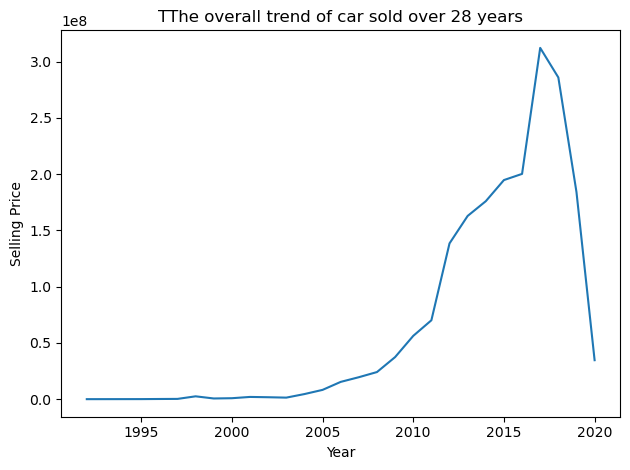

In [34]:
sell_by_year = car_clean.groupby('year')['selling_price'].sum()
plt.plot(sell_by_year.index, sell_by_year.values)
plt.title('TThe overall trend of car sold over 28 years')
plt.ylabel('Selling Price')
plt.xlabel('Year')
sell_by_year 
plt.tight_layout() 

The car commercial line chart over 28 years from 1992 to 2020 decribe a steady growth in trend line followed by the booming in market and eventual decline. From 1992 to 2005, there was an slightly increase in car sold from 50 thousands to over 8 millions, indicating a consistence growth in car industry. From the year of 2006 onwards, the revenue was observed a dramatic surge and peaked in 2017 at over 312 millions, showiwng a expansion trend in car industry, increased demand and economics explosion. Shortly thereafter, the revenue suddenly plummeted to under 35 millions in 2020 after showing a decline sign in the beginning of 2018, indicating a drop in car commercial and economics downturns.

### Figure 2: Total selling price by car brands

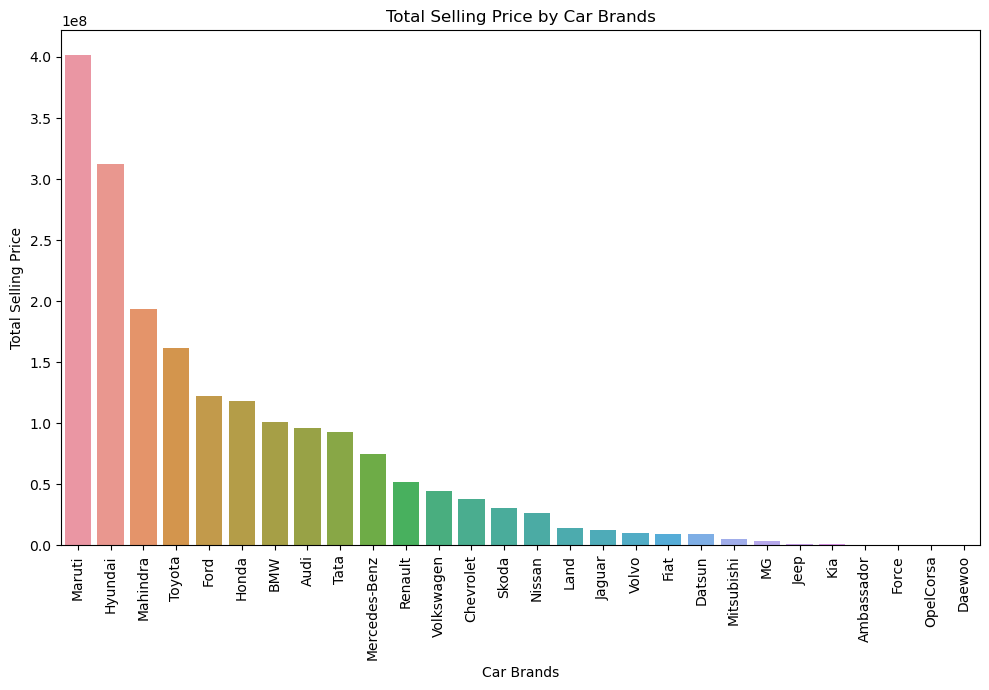

In [35]:
car_sum = car_clean.groupby('car_brand')['selling_price'].sum().reset_index()
car_sum_sorted = car_sum.sort_values(by='selling_price', ascending=False)

# Create a bar chart with sorted data
plt.figure(figsize=(10, 7))
sns.barplot(x='car_brand', y='selling_price', data=car_sum_sorted, 
            order=car_sum_sorted['car_brand'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Car Brands')
plt.ylabel('Total Selling Price')
plt.title('Total Selling Price by Car Brands')
plt.tight_layout() 
plt.show()

The bar chart illustrates the total selling price classified by various car brand in nearly 3 decades, highlighting the top 3 highest revenue resale car - Maruti, Hyunday, Mahindra respectively. Despite the high in selling price, those vehicle brands provide users a persistence car products, high safety level and better long-term value, reflected by the high resale prices. The ability to retain value over time makes them more attractive choices, an worthy and reliable investment and a top-priority options for users.

### Figure 3: Effect of kilometer driven on selling price

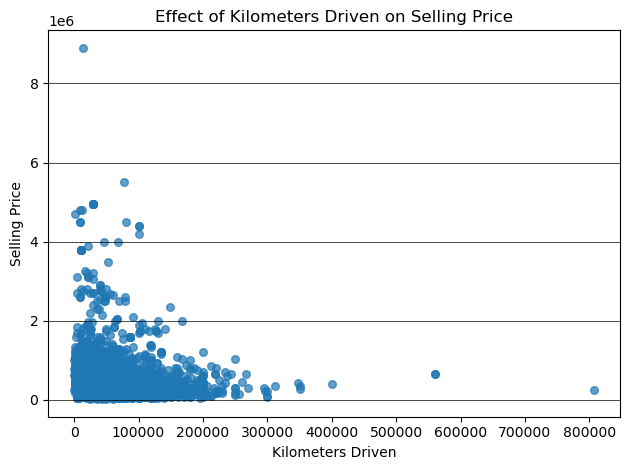

In [36]:
plt.scatter(car_clean['km_driven'], car_clean['selling_price'],s= 30, alpha=0.7)
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Effect of Kilometers Driven on Selling Price')
ax = plt.gca()
ax.yaxis.grid(True, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout() 
plt.show()

The scatter plot indicates the relationship between selling price and kilometer driven, revealing a trend where the more kilometer driven is recorded in the car, the less is charged on the price. Despite the diversity in car brands, it is a evident that even cars with extremely few kilometers driven are priced within an acceptable range, except for the luxury car brands. As a result, consumers who are searching for a good deal should give consideration to cars with low to moderate mileage because they provide a reliable and affordable combination. However, if the goal is seeking for the high retaining value and extraodinary experiences, the high prices with low mileage luxury car brands would be recommended.

### Figure 4: The relationship between selling price and kilometer driven based on owners type

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


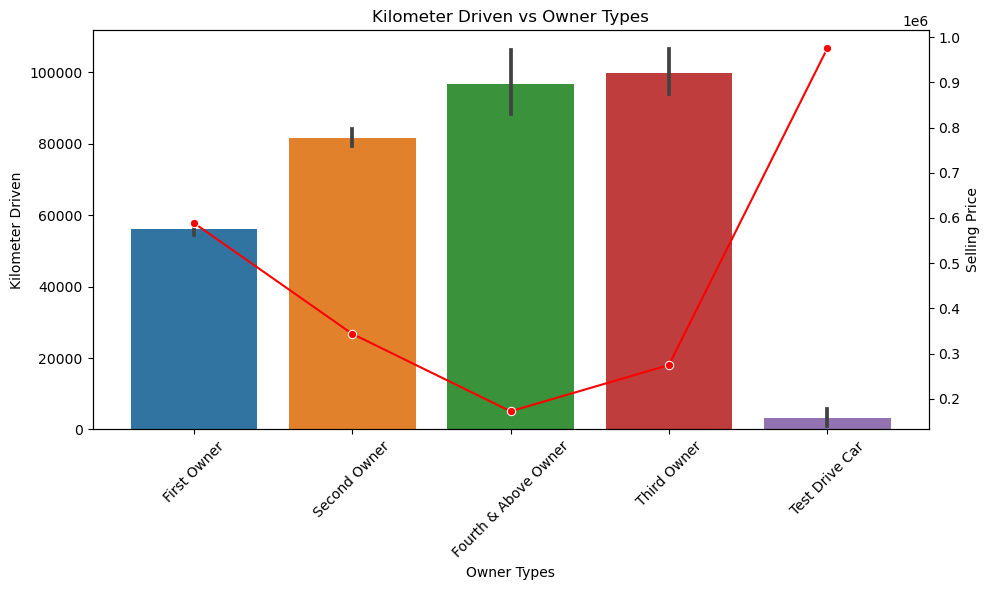

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'owner', y = 'km_driven', data = car_clean, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Owner Types')
ax1.set_ylabel('Kilometer Driven')
ax1.set_title('Kilometer Driven vs Owner Types')

ax2 = ax1.twinx()
owner_sell = car_clean.groupby('owner')['selling_price'].mean().reset_index()
owner_sell_sorted = owner_sell.set_index('owner').reindex(car_clean['owner'].unique()).reset_index()

sns.lineplot(x='owner', y= 'selling_price', data=owner_sell_sorted, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Selling Price')
plt.tight_layout() 



It is advised that buying a used car, better concentrating on cars that have only had one or two prior owners as first-owner vehicles typically receive better maintenance and have a more dependable history, they also haven't been used as frequently, these vehicles are typically in better shape. Although test-driven cars tend to have lesser mileage, which makes them seem attractive, their higher pricing frequently do not make the extra expense worthwhile, especially when taking into account possible wear from many test drives. As a result give first-owner cars priority as they are frequently better maintained and have fewer hidden problems, which lowers the likelihood of unexpected repairs.



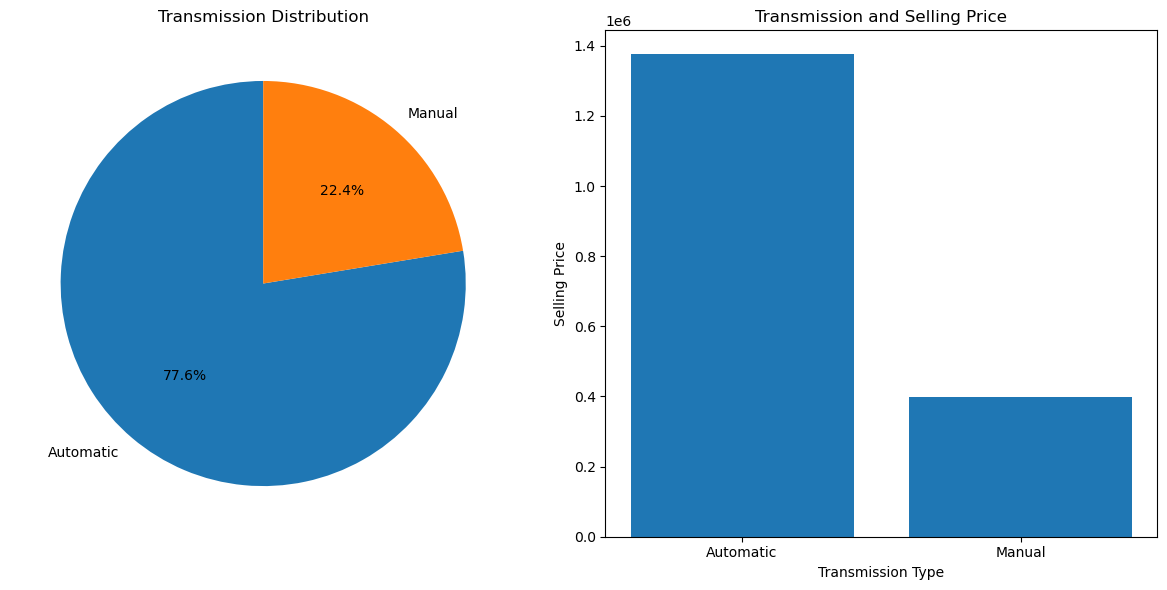

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

transmission_price = car_clean.groupby('transmission')['selling_price'].mean()

# Plot a pie chart on the first subplot
ax1.pie(transmission_price.values, labels=transmission_price.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Transmission Distribution')

# Plot a bar chart on the second subplot
ax2.bar(transmission_price.index, transmission_price.values, data=car_clean)
ax2.set_title('Transmission and Selling Price')
ax2.set_ylabel('Selling Price')
ax2.set_xlabel('Transmission Type')

plt.tight_layout() 
plt.show()

The analysis reveals that the majority of cars in the dataset, approximately 77.6%, have automatic transmissions, while only 22.4% are manual. This shows that automatic transmissions appeal to a particular customer category willing to pay a higher price and are seen as more premium, probably because of their advanced features and ease of use. 

## Summary and insight through analysis
When looking for the benefical and advantageous car options, consumers should give consideration about making an investment in reputable brands found in top section car brands that have strong retain values and provide long-term durability. Besides, automatic transmissions appeal to people who value convenience and cutting-edge technologies, even though they are more costly than manual type. A lower mileage  generally means fewer unexpected repairs and a longer lifespan. Additionally, considering the ownership history should be taken into account, reavealing one or two previous owners are likely to have received better maintenance and are in better shape. Therefore, customers should rely on their demands to meke a suitable and valuable purchase..


## 4. Detect and remove outliers

In [19]:
car_clean.owner.nunique()

5

In [20]:
car_clean.owner.value_counts()

owner
First Owner             2532
Second Owner            1000
Third Owner              273
Fourth & Above Owner      67
Test Drive Car            14
Name: count, dtype: int64

In [21]:
#Drop the invalid owner types
car_cleaned = car_clean.drop(car_clean.index[(car_clean.owner == 'Fourth & Above Owner') | 
                                             (car_clean.owner == 'Test Drive Car')])
car_cleaned.owner.value_counts()

owner
First Owner     2532
Second Owner    1000
Third Owner      273
Name: count, dtype: int64

In [22]:
car_cleaned.shape

(3805, 8)

In [23]:
car_cleaned.fuel.value_counts()

fuel
Diesel      1885
Petrol      1866
CNG           33
LPG           20
Electric       1
Name: count, dtype: int64

In [24]:
#Drop the invalid fuel types
car_cleaned = car_clean.drop(car_clean.index[(car_clean.fuel == 'CNG') | 
                                            (car_clean.fuel == 'Electric') | 
                                            (car_clean.fuel == 'LPG')])
car_cleaned.shape
car_cleaned.fuel.value_counts()

fuel
Diesel    1919
Petrol    1912
Name: count, dtype: int64

In [45]:
car_cleaned.seller_type.value_counts()

seller_type
Individual          2859
Dealer               878
Trustmark Dealer      94
Name: count, dtype: int64

In [28]:
#Drop the invalid seller_types
car_cleaned = car_clean.drop(car_clean.index[(car_clean.seller_type == 'Trustmark Dealer')])
car_cleaned.shape
car_cleaned.seller_type.value_counts()

seller_type
Individual    2903
Dealer         889
Name: count, dtype: int64

In [29]:
car_clean.shape

(3886, 8)